0.12.3


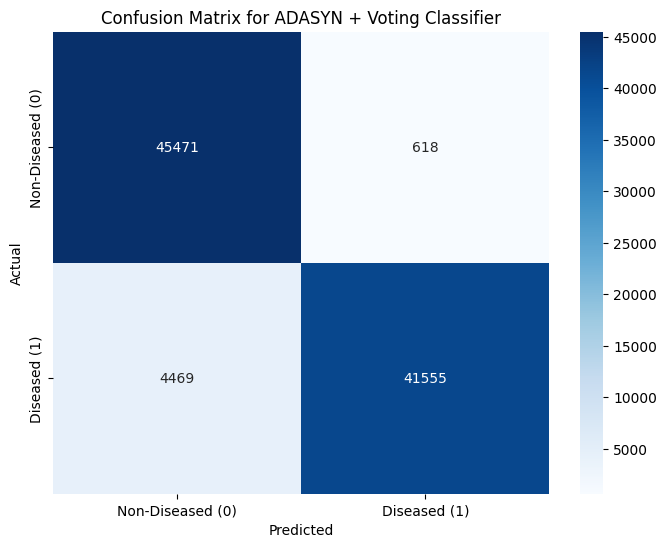

ADASYN + Voting Classifier Performance:
Sensitivity: 0.9029
Specificity: 0.9866
Accuracy: 0.9448
MCC: 0.8927
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     46089
         1.0       0.99      0.90      0.94     46024

    accuracy                           0.94     92113
   macro avg       0.95      0.94      0.94     92113
weighted avg       0.95      0.94      0.94     92113

Time taken for training: 47.3232 seconds


In [1]:
#adasyn voting

import pandas as pd
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Load dataset
data = pd.read_csv('Heart_disease.csv')

# Define the target column
target = "HeartDiseaseorAttack"

# Split the data into features and target
X = data.drop(target, axis=1)  # Features
y = data[target]  # Target variable

# Apply ADASYN for oversampling
adasyn = ADASYN(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)

# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize individual classifiers
rf_classifier = RandomForestClassifier(random_state=42)
dt_classifier = DecisionTreeClassifier(random_state=42)

# Create the VotingClassifier with majority voting
voting_clf = VotingClassifier(estimators=[('rf', rf_classifier), ('dt', dt_classifier)], voting='hard')

# Start timing the training process
start_time = time.time()

# Train the Voting Classifier
voting_clf.fit(X_train, y_train)

# End timing
training_time = time.time() - start_time

# Predict on test data
y_pred = voting_clf.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Calculate Sensitivity (Recall) and Specificity
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

# Calculate MCC
mcc = matthews_corrcoef(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diseased (0)', 'Diseased (1)'], yticklabels=['Non-Diseased (0)', 'Diseased (1)'])
plt.title('Confusion Matrix for ADASYN + Voting Classifier')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Evaluate the Voting Classifier
print("ADASYN + Voting Classifier Performance:")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"MCC: {mcc:.4f}")  # Display MCC
print(classification_report(y_test, y_pred))

print(f"Time taken for training: {training_time:.4f} seconds")  # Display training time


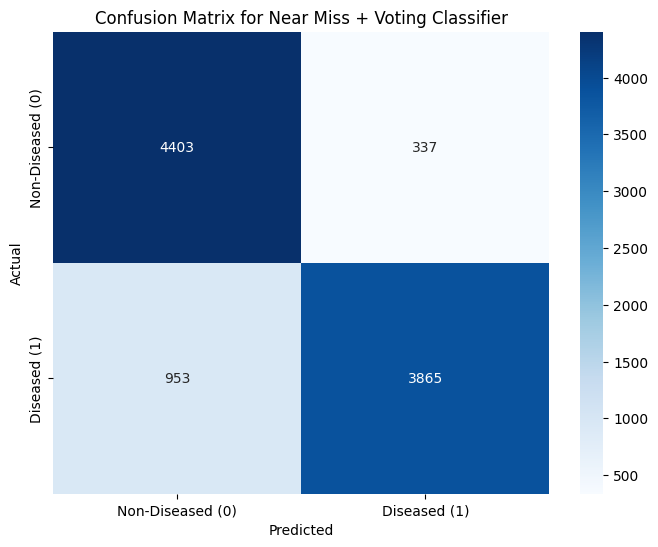

Near Miss + Voting Classifier Performance:
Accuracy: 0.8650
Sensitivity: 0.8022
Specificity: 0.9289
MCC: 0.7365
              precision    recall  f1-score   support

         0.0       0.82      0.93      0.87      4740
         1.0       0.92      0.80      0.86      4818

    accuracy                           0.87      9558
   macro avg       0.87      0.87      0.86      9558
weighted avg       0.87      0.87      0.86      9558

Time taken for training: 2.2899 seconds


In [2]:
# near miss voting

import pandas as pd
from imblearn.under_sampling import NearMiss
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Load dataset
data = pd.read_csv('Heart_disease.csv')

# Define the target column
target = "HeartDiseaseorAttack"

# Split the data into features and target
X = data.drop(target, axis=1)  # Features
y = data[target]  # Target variable

# Apply Near Miss for undersampling the majority class
near_miss = NearMiss(sampling_strategy='majority')
X_resampled, y_resampled = near_miss.fit_resample(X, y)

# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize individual classifiers
rf_classifier = RandomForestClassifier(random_state=42)
dt_classifier = DecisionTreeClassifier(random_state=42)

# Create the VotingClassifier with majority voting
voting_clf = VotingClassifier(estimators=[('rf', rf_classifier), ('dt', dt_classifier)], voting='hard')

# Start timing the training process
start_time = time.time()

# Train the Voting Classifier
voting_clf.fit(X_train, y_train)

# End timing
training_time = time.time() - start_time

# Predict on test data
y_pred = voting_clf.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Calculate Sensitivity (Recall) and Specificity
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

# Calculate MCC
mcc = matthews_corrcoef(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diseased (0)', 'Diseased (1)'], yticklabels=['Non-Diseased (0)', 'Diseased (1)'])
plt.title('Confusion Matrix for Near Miss + Voting Classifier')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Evaluate the Voting Classifier
print("Near Miss + Voting Classifier Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")

print(f"MCC: {mcc:.4f}")  # Display MCC
print(classification_report(y_test, y_pred))

print(f"Time taken for training: {training_time:.4f} seconds")  # Display training time


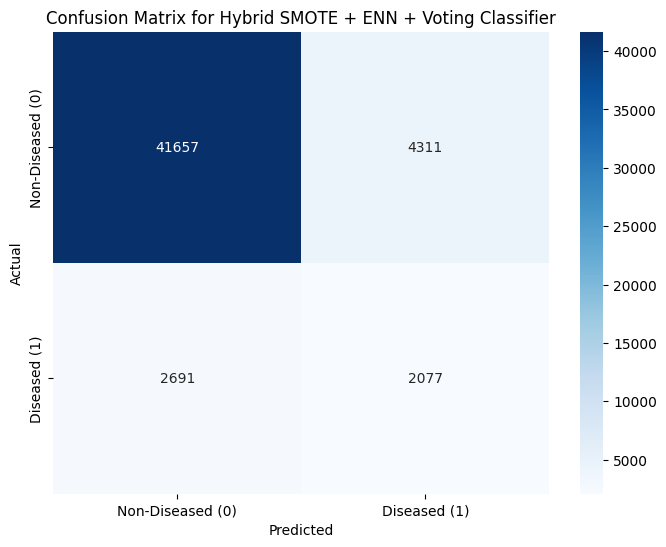

Hybrid SMOTE + ENN + Voting Classifier Performance:
Sensitivity: 0.4356
Specificity: 0.9062
Accuracy: 0.8620
MCC: 0.3007
              precision    recall  f1-score   support

         0.0       0.94      0.91      0.92     45968
         1.0       0.33      0.44      0.37      4768

    accuracy                           0.86     50736
   macro avg       0.63      0.67      0.65     50736
weighted avg       0.88      0.86      0.87     50736

Sensitivity: 0.4356
Specificity: 0.9062
Time taken for training: 207.0850 seconds


In [3]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Load dataset
data = pd.read_csv('Heart_disease.csv')

# Define the target column
target = "HeartDiseaseorAttack"

# Split the data into features and target
X = data.drop(target, axis=1)  # Features
y = data[target]  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the SMOTE + ENN pipeline
smote_enn = SMOTEENN(sampling_strategy='minority', random_state=42)

# Start timing the resampling and training process
start_time = time.time()

# Resample the training data using SMOTE + ENN
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

# Initialize individual classifiers
rf_classifier = RandomForestClassifier(random_state=42)
dt_classifier = DecisionTreeClassifier(random_state=42)

# Create the VotingClassifier with majority voting
voting_clf = VotingClassifier(estimators=[('rf', rf_classifier), ('dt', dt_classifier)], voting='hard')

# Train the Voting Classifier with the resampled data
voting_clf.fit(X_resampled, y_resampled)

# End timing
training_time = time.time() - start_time

# Predict on test data
y_pred = voting_clf.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Calculate Sensitivity (Recall) and Specificity
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

# Calculate MCC
mcc = matthews_corrcoef(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diseased (0)', 'Diseased (1)'], yticklabels=['Non-Diseased (0)', 'Diseased (1)'])
plt.title('Confusion Matrix for Hybrid SMOTE + ENN + Voting Classifier')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Evaluate the Voting Classifier
print("Hybrid SMOTE + ENN + Voting Classifier Performance:")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"MCC: {mcc:.4f}")  # Display MCC
print(classification_report(y_test, y_pred))
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Time taken for training: {training_time:.4f} seconds")  # Display training time
